In [1]:
import platform
from matplotlib import rc
system = platform.system()
if system == 'Darwin':  # macOS
    rc('font', family='AppleGothic')
elif system == 'Windows':  # Windows
    rc('font', family='Malgun Gothic')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
open_df = pd.read_csv('/Users/t2023-m0033/Desktop/내일배움캠프/최종프로젝트/streamlit/open_df.csv', encoding='utf-8-sig')

In [3]:
# '가격 구간'을 원래의 순서로 카테고리형 변환 (예시)
price_order = [
    '0만원대', '10만원대', '20만원대', '30만원대', '40만원대', '50만원대', 
    '60만원대', '70만원대', '80만원대', '90만원대', '100만원 이상'
]
open_df['가격 구간'] = pd.Categorical(open_df['가격 구간'], categories=price_order, ordered=True)

In [4]:
open_df['라벨링'].fillna('', inplace=True)

In [4]:
open_df

,대분류,가격 구간,1회 방송당 판매량,방송 수,효과 크기,라벨링
0,패션의류,0만원대,0.000000,23910,1,
1,화장품/미용,0만원대,0.000868,8064,2,
2,화장품/미용,0만원대,0.012029,8064,2,
3,패션의류,0만원대,0.002802,23910,1,
4,화장품/미용,0만원대,0.000620,8064,2,
...,...,...,...,...,...,...
110359,패션의류,0만원대,0.000084,23910,1,
110360,식품,0만원대,0.000000,26671,1,
110361,패션의류,0만원대,0.000209,23910,1,
110362,디지털/가전,0만원대,0.000000,3261,1,


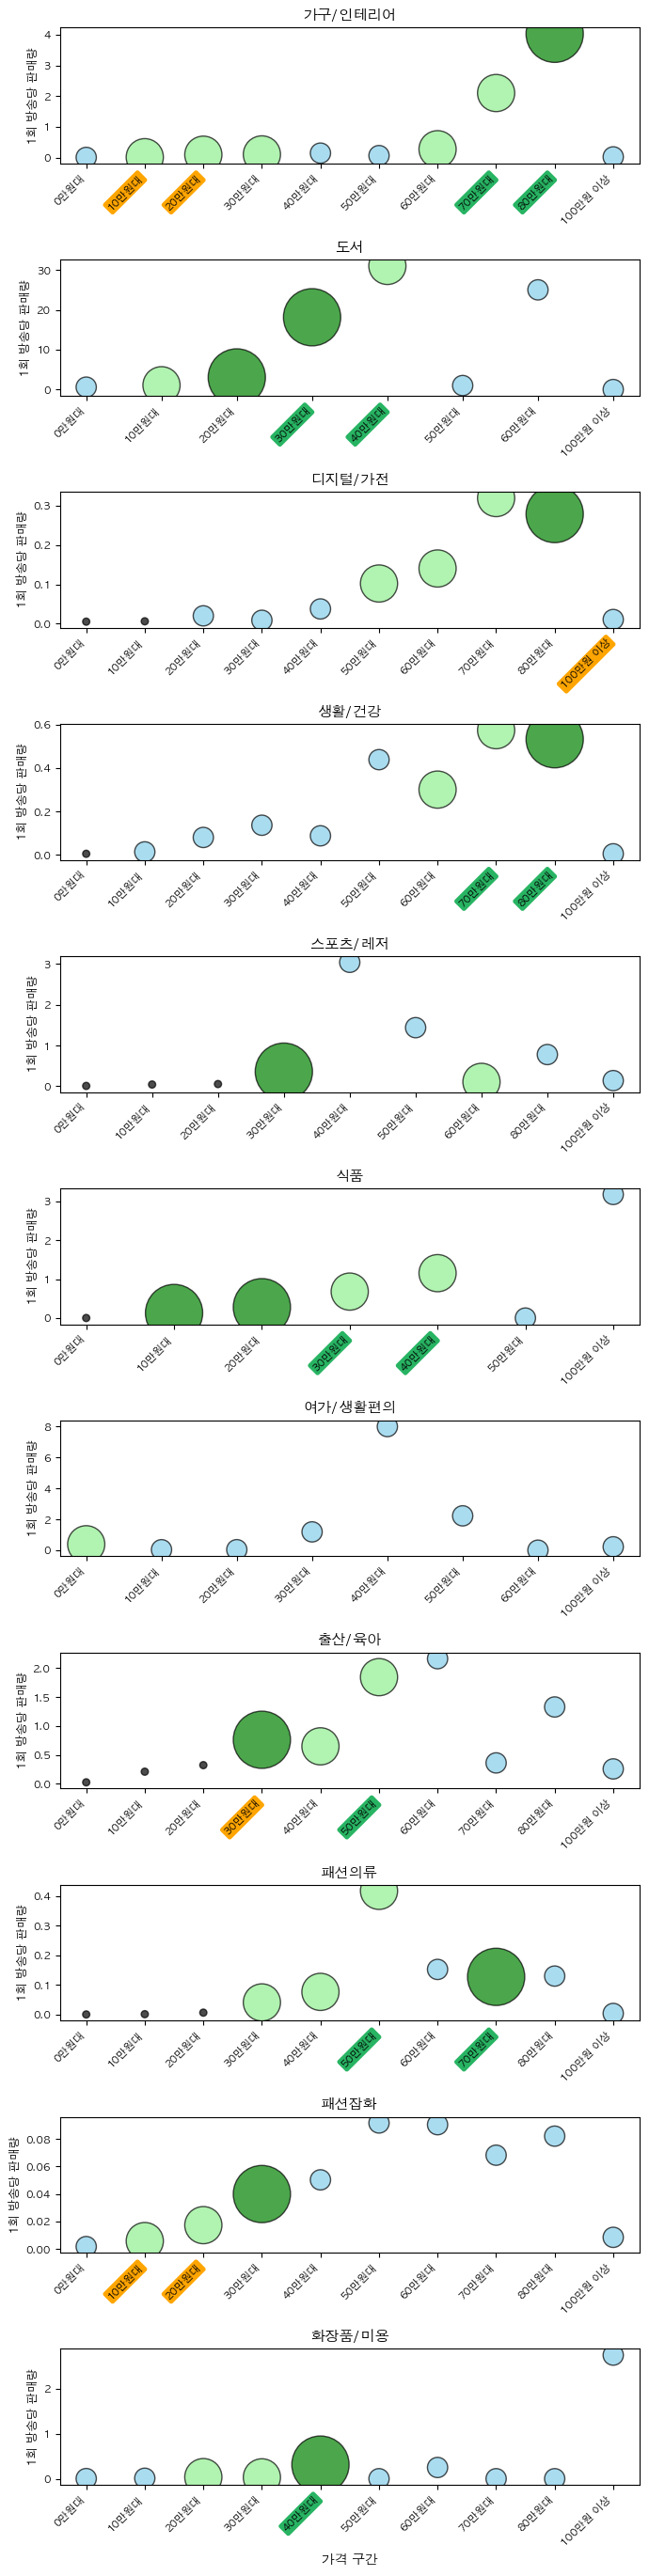

In [5]:
# 5. 버블플롯 (구간별 색깔 다르게 지정 + 라벨링 음영 추가)

categories = sorted(open_df['대분류'].unique())

# 버블 색상: 효과크기(1,2,3,4) 기준
color_map = {
    1: 'black',
    2: 'skyblue',
    3: 'lightgreen',
    4: 'green'
}

# x축 라벨 음영: 라벨링(opportunity/test) 기준
tick_color_map = {
    'opportunity': '#FFA500',  
    'test': '#28B463',    
    0: 'white'
}

fig, axes = plt.subplots(
    nrows=len(categories),
    ncols=1,
    figsize=(7, len(categories)*2.5),
    sharey=False
)

if len(categories) == 1:
    axes = [axes]

for j, cat in enumerate(categories):
    sub = open_df[open_df['대분류'] == cat].copy()
    if sub.empty:
        axes[j].set_visible(False)
        continue

    agg = (
        sub
        .groupby('가격 구간', as_index=False)
        .agg(
            효과크기=('효과 크기', 'mean'),
            평균판매량=('1회 방송당 판매량', 'mean'),
            버블컬러=('효과 크기', 'first'),   # 버블 색상: 숫자 (1,2,3,4)
            라벨링=('라벨링', 'first')         # x축 음영: 문자 (opportunity/test)
        )
        .dropna()
        .sort_values('가격 구간')
    )

    labels = agg['가격 구간'].astype(str).tolist()
    x = np.arange(len(labels))
    y = agg['평균판매량']
    sizes = np.power(agg['효과크기'], 3) * 30

    # ① 버블 색상
    bubble_colors = agg['버블컬러'].map(color_map)

    axes[j].scatter(x, y, s=sizes, c=bubble_colors, alpha=0.7, edgecolors='black')
    axes[j].set_xticks(x)
    axes[j].set_xticklabels(labels, rotation=45, ha='right', fontsize=8)

    # ② x축 라벨 음영
    label_shades = agg['라벨링'].map(tick_color_map).fillna('white')
    for tick, shade in zip(axes[j].get_xticklabels(), label_shades):
        tick.set_bbox(dict(facecolor=shade, edgecolor='none', boxstyle='round,pad=0.22'))

    axes[j].tick_params(axis='y', labelsize=8)
    axes[j].set_ylabel('1회 방송당 판매량', fontsize=9)
    axes[j].set_title(f'{cat}', fontsize=11)

axes[-1].set_xlabel('가격 구간', fontsize=10)
plt.tight_layout()
plt.show()